In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('cardio_train.csv',sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [2]:
#Drop Redundant Column: The id column is a unique identifier and adds no predictive value, so you should remove it.
#axis=0 → operate on rows
#axis=1 → operate on columns
df.drop('id',axis=1,inplace=True)

In [3]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#Convert Age: from days to years
# We use integer division or casting to get the age in full years.
#age column amj rese we just add age_years
df['age_years'] = (df['age'] / 365.25).astype(int)

In [5]:
# Drop the original 'age' column (in days) now that we have 'age_years'
df = df.drop('age', axis=1)
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,1,163,72.0,135,80,1,2,0,0,0,1,61


In [6]:
#Create BMI Feature for feature reduction (Dimensionality Reduction)
#Convert height from cm to meters (height / 100)
df['height_m'] = df['height'] / 100

In [7]:
#Calculate BMI
df['bmi'] = df['weight']/(df['height_m']**2)

In [8]:
df = df.drop('height_m', axis=1)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       70000 non-null  int64  
 1   height       70000 non-null  int64  
 2   weight       70000 non-null  float64
 3   ap_hi        70000 non-null  int64  
 4   ap_lo        70000 non-null  int64  
 5   cholesterol  70000 non-null  int64  
 6   gluc         70000 non-null  int64  
 7   smoke        70000 non-null  int64  
 8   alco         70000 non-null  int64  
 9   active       70000 non-null  int64  
 10  cardio       70000 non-null  int64  
 11  age_years    70000 non-null  int32  
 12  bmi          70000 non-null  float64
dtypes: float64(2), int32(1), int64(10)
memory usage: 6.7 MB
None


In [10]:
# --- Assuming 'df' is your DataFrame after initial cleanup (BMI/age_years created) ---
# Remove rows where Diastolic BP(ap_lo)> Systolic BP(ap_hi) (impossible)
original_rows = df.shape[0]
original_rows

70000

In [11]:
#Handling Blood Pressure Outliers
df = df[df['ap_lo'] < df['ap_hi']]

In [12]:
# 2. Remove records with extreme low and high BP values based on reasonable clinical ranges.
# Minimum reasonable diastolic pressure (e.g., >= 40)
# Minimum reasonable systolic pressure (e.g., >= 70)
# Maximum reasonable diastolic pressure (e.g., <= 140)
# Maximum reasonable systolic pressure (e.g., <= 240)
df = df[
    (df['ap_lo'] >= 40) & (df['ap_lo'] <= 140) &
    (df['ap_hi'] >= 70) & (df['ap_hi'] <= 240)
]

In [13]:
rows_removed = original_rows - df.shape[0]

In [14]:
print(f"Total records before cleaning: {original_rows}")
print(f"Total records removed due to BP anomalies: {rows_removed}")
print(f"Total records remaining: {df.shape[0]}")

Total records before cleaning: 70000
Total records removed due to BP anomalies: 1336
Total records remaining: 68664


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1️⃣ Split features and target
X = df.drop('cardio', axis=1)   # input features
y = df['cardio']                # target column

# 2️⃣ Train–Test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3️⃣ Columns that need scaling
numerical_cols = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']

# 4️⃣ Scale numerical data
# scaler = StandardScaler()

# Learn from training data and apply scaling
# X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Apply same scaling to test data
# X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("✅ Data split & scaling completed")
print("Training data shape:", X_train.shape)

✅ Data split & scaling completed
Training data shape: (54931, 12)


In [23]:
X_train

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi
15198,1,165,68.0,130,80,1,1,0,0,1,53,24.977043
18687,1,167,70.0,120,70,1,1,0,0,1,50,25.099502
8385,1,150,64.0,120,60,2,1,0,0,1,55,28.444444
8934,1,158,78.0,120,80,2,2,0,0,1,49,31.244993
25596,2,180,75.0,120,80,1,1,1,0,1,42,23.148148
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,2,159,63.0,110,80,1,1,0,0,1,63,24.919900
36016,2,176,94.0,140,80,1,1,0,0,0,54,30.346074
37525,1,187,75.0,120,70,1,1,0,0,0,50,21.447568
36942,1,166,64.0,110,70,1,1,0,0,1,53,23.225432


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create model
model = LogisticRegression(max_iter=1000)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7206728318648511


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[5390 1550]
 [2286 4507]]


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6940
           1       0.74      0.66      0.70      6793

    accuracy                           0.72     13733
   macro avg       0.72      0.72      0.72     13733
weighted avg       0.72      0.72      0.72     13733



In [27]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.7848570489794757


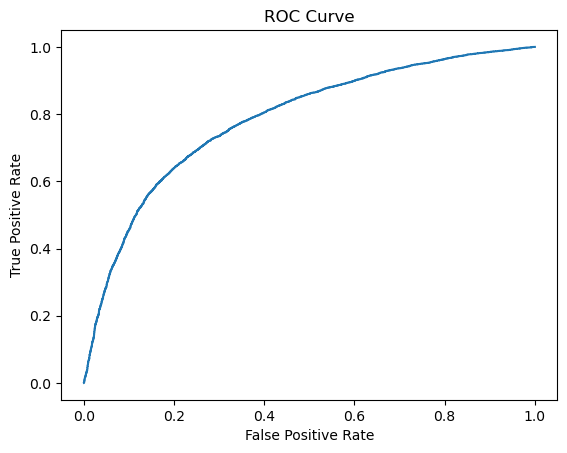

In [28]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [29]:
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(feature_importance)


        Feature  Coefficient
5   cholesterol     0.515475
3         ap_hi     0.056141
10    age_years     0.051543
2        weight     0.014095
4         ap_lo     0.011744
0        gender     0.003948
11          bmi    -0.007071
1        height    -0.008404
6          gluc    -0.134271
7         smoke    -0.135526
8          alco    -0.217455
9        active    -0.237109


In [30]:
import joblib 
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [31]:
# Save the model
joblib.dump(model, 'rf_model.pkl')

['rf_model.pkl']